# UAS
# Kecerdasan Buatan 2023/2024

Soal:
Diberikan sebuah dataset berupa gambar angka 1-10. Buatlah sebuah model yang dapat meng-klasifikasikan gambar tersebut menggunakan metode ANN (Artificial Neural Network). Di bawah ini sudah disediakan step-by-stepnya. Silahkan Dicermati

Beberapa library yang harus diinstal dan disiapkan
1. Sklearn (pip install scikit-learn)
2. Pandas
3. Numpy
4. Matplotlib
5. Keras (pip install keras)

====================================================================================================

### Import beberapa library yang akan kita gunakan

In [12]:
pip install lion-pytorch

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install pydot graphviz pydotplus

     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     ----- ------------------------------- 41.0/278.7 kB 960.0 kB/s eta 0:00:01
     -------------------------- ----------- 194.6/278.7 kB 2.3 MB/s eta 0:00:01
     -------------------------------------- 278.7/278.7 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24578 sha256=b2574ff146fee0dc907d2ea7def8c361843cfa99fcd45736f0105e3b28d157c9
  Stored in directory: c:\users\bayua\appdata\local\pip\cache\wheels\69\b2\67\08f0eef649af92df772c09f451558298e07fab1bc7cdf33db0
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [4]:
#Import library-library yang akan digunakan

import keras
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.callbacks import TensorBoard
from sklearn.metrics import confusion_matrix
import seaborn as sns

### Load Dataset

Dataset yang kita gunakan adalah dataset MNIST http://yann.lecun.com/exdb/mnist/

In [5]:
#Load Dataset
#Bisa dengan cara di download dulu (Dowload sendiri di internet) kemudian di load atau import dari keras

data = mnist.load_data()
type(data)

# filenya gk bisa didownload manual pak :)"

tuple

### Preview dataset yang sudah kalian download 

X_train original shape: (60000, 28, 28)
y_train original shape: (60000,)


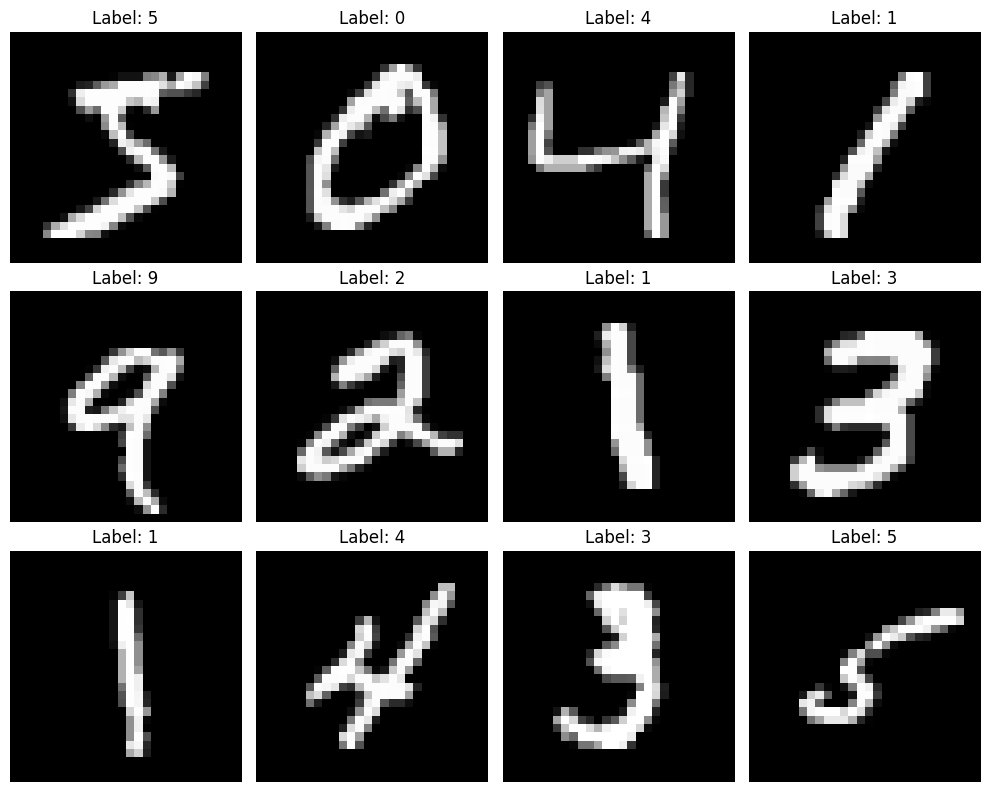

'\nX_train adalah array yang memiliki 60,000 gambar, di mana setiap gambar berukuran 28x28 piksel\n\ny_train adalah array yang memiliki 60,000 label, di mana setiap label berhubungan dengan \nsalah satu dari 60,000 gambar di X_train. Setiap label adalah angka yang menunjukkan digit \nyang sesuai dengan gambar (misalnya, 0-9).\n\n'

In [6]:
#code untuk preview dataset MNIST. Tampilkan min 12 gambar
# Jangan lupa Mengimpor library Matplotlib untuk visualisasi data

# 'data' sudah didefinisikan sebelumnya dan load dataset MNIST
(X_train, y_train), (X_test, y_test) = data  # Memisahkan dataset MNIST menjadi data Training dan Test

# Mencetak bentuk asli dari dataset pelatihan
print(f"X_train original shape: {X_train.shape}")  
print(f"y_train original shape: {y_train.shape}")  

# Definisi fungsi untuk menampilkan gambar
def display_images(images, labels, num_images=12):
    plt.figure(figsize=(10, 8))  # Membuat figure baru dengan ukuran 10x8 inci
    for i in range(num_images):  # Mengiterasi untuk menampilkan sejumlah gambar
        plt.subplot(3, 4, i + 1)  # Membuat subplot dalam grid 3 baris x 4 kolom
        plt.imshow(images[i], cmap='gray')  # Menampilkan gambar pada indeks ke-i dalam skala abu-abu
        plt.title(f"Label: {labels[i]}")  # Memberikan judul pada setiap subplot sesuai dengan label gambar
        plt.axis('off')  # Menonaktifkan sumbu horizonatal/vertikal
    plt.tight_layout()  # settingUp Tata letak agar subplot(grafik yang berada dalam satu gambar) tidak saling tumpang tindih
    plt.show()  # Menampilkan figure yang telah dibuat

# Menampilkan 12 gambar pertama dari dataset pelatihan
display_images(X_train, y_train, num_images=12)  # Memanggil fungsi tuk menampilkan gambar


'''
X_train adalah array yang memiliki 60,000 gambar, di mana setiap gambar berukuran 28x28 piksel

y_train adalah array yang memiliki 60,000 label, di mana setiap label berhubungan dengan 
salah satu dari 60,000 gambar di X_train. Setiap label adalah angka yang menunjukkan digit 
yang sesuai dengan gambar (misalnya, 0-9).

'''


### Data Preprocessing

Dataset yang berbentuk gambar juga perlu dilakukan preprocessing. Ada banyak yang bisa dilakukan, salah satu contoh yaitu adalah normalisasi nilai pada setiap pixel. Namun step ini bersifat optional. Jika dirasa tidak perlu preprocessing bisa langsung skip ke step selanjutnya 

#### Tips : Value class pada dataset mnist bisa diubah bentuknya menjadi one hot encoding agar memudahkan neural network bekerja (https://www.kaggle.com/code/dansbecker/using-categorical-data-with-one-hot-encoding) (https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/)

In [7]:
#Code untuk preprocessing
'''
Diperlukan krn kita perlu memastikan model dapat Learning lebih cepat serta menghindari masalah numerik.

'''

X_train = X_train.astype('float32') / 255  # Mengubah tipe data menjadi float32 dan membagi dengan 255 untuk normalisasi
X_test = X_test.astype('float32') / 255  # Mengubah tipe data menjadi float32 dan membagi dengan 255 untuk normalisasi

# Reshape data to fit model (Opsional)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))  # Mengubah bentuk data agar sesuai dengan input model
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))  # Mengubah bentuk data agar sesuai dengan input model

# one-hot encoding (Labels)
y_train = to_categorical(y_train, 10)  # Mengubah label menjadi one-hot encoding (60000, 10)
y_test = to_categorical(y_test, 10) 

print(f"X_train bentuk setelah preprocessing: {X_train.shape}")
print(f"y_train bentuk setelah preprocessing: {y_train.shape}")  

X_train bentuk setelah preprocessing: (60000, 28, 28, 1)
y_train bentuk setelah preprocessing: (60000, 10)


### NB: Pada dataset ini kita tidak perlu melakukan splitting data karena dari datasetnya sudah dipisah training dan testing

====================================================================================================

### Proses Learning Menggunakan Artificial Neural Network

Pada step ini kalian bebas membuat/merancang susunan Neural Network. Semakin bagus hasil akurasi yang di dapat maka nilai UAS yang didapatkan akan semakin tinggi

### Build model Neural Network

In [8]:
# code untuk membuat susunan neural network (DILARANG MENGGUNAKAN CNN. HANYA BOLEH MENGGUNAKAN NN biasa)
# Untuk optimasi bisa menggunakan layer pendukung seperti dropout. Bisa juga menggunakan beberapa activation function (RelU)

# Build the neural network model
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='elu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='elu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# Kompilasi model
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

C:\Users\bayua\miniconda3\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Train the model

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8423 - loss: 0.5303 - val_accuracy: 0.9542 - val_loss: 0.1525
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9507 - loss: 0.1783 - val_accuracy: 0.9667 - val_loss: 0.1166
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9588 - loss: 0.1481 - val_accuracy: 0.9729 - val_loss: 0.0976
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9645 - loss: 0.1286 - val_accuracy: 0.9756 - val_loss: 0.0908
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9681 - loss: 0.1171 - val_accuracy: 0.9743 - val_loss: 0.0911
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9700 - loss: 0.1136 - val_accuracy: 0.9767 - val_loss: 0.0916
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9735 - loss: 0.0978 - val_accuracy: 0.9781 - val_loss: 0.0859
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9743 - loss: 0.0974 - 

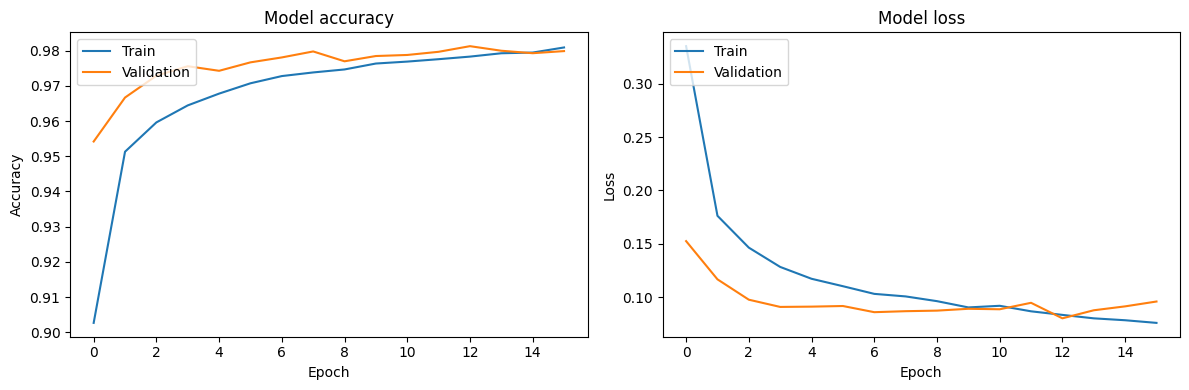

In [9]:
# code untuk train model
# Silahkan tentukan epoch dan learning rate agar hasilnya maksimal


# Definisikan callback EarlyStopping untuk menghentikan pelatihan ketika akurasi mencapai lebih dari 98%
class EarlyStoppingByAccuracy(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') >= 0.98:
            print("\nReached 98% accuracy so stopping training!")
            self.model.stop_training = True

early_stopping = EarlyStoppingByAccuracy()

tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)

# Train model
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_test, y_test), callbacks=[early_stopping, tensorboard_callback])

# Plot nilai accuracy pelatihan & validasi
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot nilai loos pelatihan & validasi
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

====================================================================================================

## Pengujian

Setelah kita membuat model klasifikasi dengan menggunakan algoritma Artificial Neural Network, hal selanjutnya yaitu kita perlu menguji apakah model yang telah kita buat sudah handal dan baik dalam melakukan klasifikasi pada dataset MNIST. Metrics atau satuan pengukuran yang akan kita gunakan adalah Accuracy dan Precision

##### Ada nilai tambah jika menggunakan confusion matrix (optional)

### Hitung nilai akurasi dan presisi

In [11]:
from sklearn.metrics import precision_score, accuracy_score

# Prediksi probabilitas kelas untuk data uji
y_pred_prob = model.predict(X_test)

# Ambil kelas dengan probabilitas tertinggi sebagai prediksi
y_pred = np.argmax(y_pred_prob, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Menghitung presisi
precision = precision_score(np.argmax(y_test, axis=1), y_pred, average='weighted')
print(f'Precision: {precision * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step
Accuracy: 97.99%
Precision: 98.00%


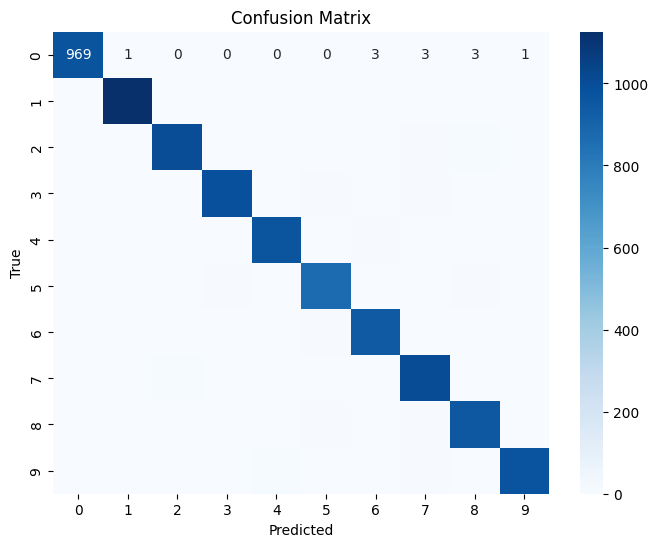

In [47]:
# Code untuk visualisasi gambar dan hasil klasifikasinya

# Mendapatkan confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# Visualisasi confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Visualisasi Hasil Klasifikasi

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


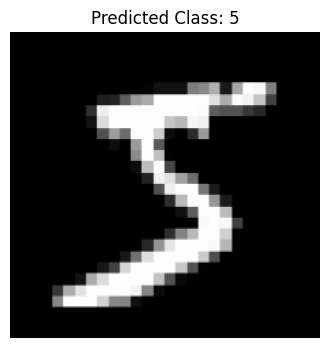

Kelas yang diprediksi untuk Lima.png: 5


In [57]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Fungsi untuk memproses satu file gambar
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.convert('L')  # Mengonversi gambar ke skala abu-abu
    img = img.resize((28, 28))  # Mengubah ukuran gambar untuk sesuaikan dengan ukuran dataset MNIST
    img = np.array(img)
    img = img.reshape((1, 28, 28, 1))  # Mengubah bentuk gambar untuk sesuaikan dengan bentuk input model
    img = img.astype('float32') / 255.0  # Normalisasi nilai piksel
    return img

# Tentukan nama file gambar dan pathnya
image_filename = 'Lima.png'
image_path = os.path.join(os.getcwd(), image_filename)

# Preproses gambar
image_to_predict = preprocess_image(image_path)

# Prediksi kelas untuk gambar
predicted_class = np.argmax(model.predict(image_to_predict), axis=-1)[0]

# Tampilkan gambar
plt.figure(figsize=(4, 4))
img = Image.open(image_path)
plt.imshow(img, cmap='gray')
plt.title(f'Predicted Class: {predicted_class}')
plt.axis('off')
plt.show()

print(f"Kelas yang diprediksi untuk {image_filename}: {predicted_class}")


In [18]:
pip install scikit-image

     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     ---------------------------------------- 0.1/12.9 MB 1.6 MB/s eta 0:00:09
      --------------------------------------- 0.2/12.9 MB 2.7 MB/s eta 0:00:05
     - -------------------------------------- 0.5/12.9 MB 4.2 MB/s eta 0:00:03
     --- ------------------------------------ 1.2/12.9 MB 7.0 MB/s eta 0:00:02
     ------- -------------------------------- 2.3/12.9 MB 10.2 MB/s eta 0:00:02
     ---------- ----------------------------- 3.3/12.9 MB 12.4 MB/s eta 0:00:01
     ------------- -------------------------- 4.5/12.9 MB 14.2 MB/s eta 0:00:01
     ----------------- ---------------------- 5.7/12.9 MB 15.8 MB/s eta 0:00:01
     --------------------- ------------------ 6.9/12.9 MB 16.9 MB/s eta 0:00:01
     ------------------------- -------------- 8.1/12.9 MB 17.8 MB/s eta 0:00:01
     ---------------------------- ----------- 9.2/12.9 MB 18.5 MB/s eta 0:00:01
     ------------------------------- ------- 10.4/12

In [29]:
pip install opencv-python

     ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/38.8 MB 1.7 MB/s eta 0:00:23
     ---------------------------------------- 0.2/38.8 MB 3.0 MB/s eta 0:00:13
      --------------------------------------- 0.6/38.8 MB 4.0 MB/s eta 0:00:10
     - -------------------------------------- 1.2/38.8 MB 6.3 MB/s eta 0:00:07
     -- ------------------------------------- 2.0/38.8 MB 8.4 MB/s eta 0:00:05
     -- ------------------------------------- 2.9/38.8 MB 10.1 MB/s eta 0:00:04
     --- ------------------------------------ 3.7/38.8 MB 11.2 MB/s eta 0:00:04
     ---- ----------------------------------- 4.6/38.8 MB 12.8 MB/s eta 0:00:03
     ----- ---------------------------------- 5.6/38.8 MB 13.3 MB/s eta 0:00:03
     ------ --------------------------------- 6.5/38.8 MB 13.8 MB/s eta 0:00:03
     ------- -------------------------------- 7.3/38.8 MB 14.2 MB/s eta 0:00:03
     -------- ------------------------------- 8.2/38.

In [24]:
pip install google-auth google-auth-oauthlib google-auth-httplib2

     ---------------------------------------- 0.0/194.6 kB ? eta -:--:--
     ------- ----------------------------- 41.0/194.6 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 194.6/194.6 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/181.2 kB ? eta -:--:--
     ------------------------------------- 181.2/181.2 kB 10.7 MB/s eta 0:00:00
  Using cached rsa-4.9-py3-none-any.whl (34 kB)
     ---------------------------------------- 0.0/96.9 kB ? eta -:--:--
     ---------------------------------------- 96.9/96.9 kB ? eta 0:00:00
     ---------------------------------------- 0.0/85.3 kB ? eta -:--:--
     ---------------------------------------- 85.3/85.3 kB 4.7 MB/s eta 0:00:00
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
Note: you may need to restart the kernel to use updated packages.


====================================================================================================

Silahkan dilengkapi kode di atas. Pastikan tidak ada code error. Kemudian buat sebuah laporan yang menjelaskan
step by step dari notebook ini dan juga strategi kalian dalam menyusun Neural Network agar mendapatkan nilai yang maksimal. Tidak lupa juga jelaskan susunan neural network yang telah kalian buat. Jangan lupa cantumkan Nama, NIM, dan Kelas. Deadline pengerjaan sampai 07 Juli 2024 Pukul 12.00 WIB
Note: Susunan Neural Network yang sama persis akan dikenakan pengurangan nilai keduanya sebesar -50

Link pengumpulan : https://forms.gle/hU5jaGYnfDeTd5qu5